---
bibliography: [references.bib]
title: What is rule-based modelling?
---

An intricate network of protein–protein interactions is a prominent feature of any signal-transduction system @gomperts2009Signal, @hunter2000Signaling. Yet despite the high relevance of modelling site-specific details on protein-protein interactions of signalling systems, there has been a lack of standards for explicitly representing the composition and connectivity of molecular complexes @ezkurdia2009Progress. Models that incorporate complex protein-protein interaction details are generally difficult or impossible to specify and analyse, largely because of the combinatorial number of protein modifications and protein complexes that can be generated through protein–protein interactions. As explained in the Complexity Systems section of this report, this is known as combinatorial complexity which is a common challenge to our understanding of cellular regulation. We will see below how this can be resolved with rule based modelling, and more specifically with BioNetGen tools.

## BioNetGen 

BioNetGen is a set of software tools which facilitate a rule-based approach to modelling biochemical reaction kinetics, where we can largely overcome the problem of combinatorial complexity. BioNetGen language (BNGL) is a formal language which uses the BioNetGen software @faeder2009Rulebased. It allows for site-specific details of protein-protein interactions to be captured in models for the dynamics of these interactions in a systematic fashion, which also alleviates nomenclature and reusability issues. Hence, using this RBM approach is notable as it facilitates writing of multi-state modelling and can significantly, reduce the number of reactions that need to be written due to its “don’t write, don’t care” characteristic. Thereby dramatically improving the ability to model CaMKII as a dodecamer; I can make a model with multistate molecules, and specify the states of the reactants that are relevant for a particular reaction, and leave the rest unspecified. 

The name “BioNetGen” is a mnemonic for “Biological Network Generator”, but the name does not encompass all the software’s capabilities. The software not only generates reaction networks from rules, but also simulates such networks using different methods. It uses iterative application of rules to a set of seed species, which may be used to generate a network in advance of a simulation; the simulation may subsequently be carried out either by numerically solving ODEs or by implementing SSA approaches. So, for example, the same model can be simulated using either the SSA (@fig-ssa) or ODE method (@fig-ode); these models are available to run online using a jupyter notebook here too. A screenshot for each simulation type can be found below in FIGURE.

## Simple example of RBM using BioNetGen

An example of how RBM and it’s don’t care, don’t write capacity works is explained below. This section of the chapter is written as a jupyter notebook, so you can interact with the code and output figures. If you are reading the pdf version, you will see the code and images statically.

[Add images of .bngl code here]

The code below uses two files written using BioNetGen (.bngl) which are used to output the SSA FIGURE [ssa_simple_dcdw.bngl](./Dontcaredontwrite_bngl_example/ssa_simple_dcdw.bngl) and the ODE FIGURE [ode_simple_dcdw.bngl](./Dontcaredontwrite_bngl_example/ode_simple_dcdw.bngl).


In [1]:
# Don't forget to execute this cell
import bionetgen as pybng
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

('time', 'AB_complex', 'A_phosphorylated', 'A', 'B', 'C')


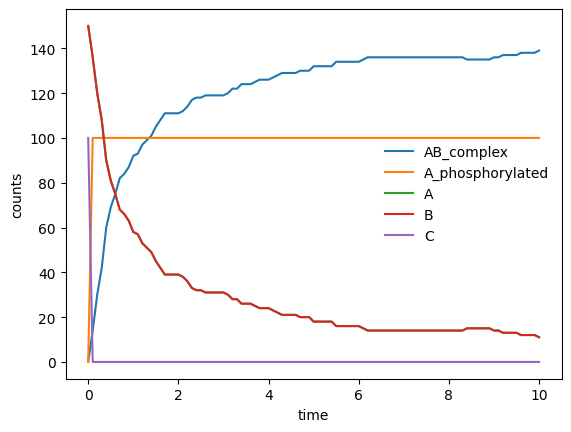

In [2]:
#| label: fig-ssa
#| fig-cap: Plot of a simple A+B=C model, which showcases a single run of an SSA simulation.
file_to_run = "./Dontcaredontwrite_bngl_example/ssa_simple_dcdw.bngl"

# don't change anything after this

# this command runs the model in a temporary folder which is removed after execution is done
r = pybng.run(file_to_run, suppress=True)[0]

print(r.dtype.names) # this will print the names of the observables
# now we can loop over each observable name and plot them
for name in r.dtype.names:
    # we don't want to plot time
    if name != "time":
        # plot the observable values over time
        plt.plot(r['time'], r[name], label=name)

plt.xlabel("time")
plt.ylabel("counts")
_ = plt.legend(frameon=False)

('time', 'AB_complex', 'A_phosphorylated', 'A', 'B', 'C')


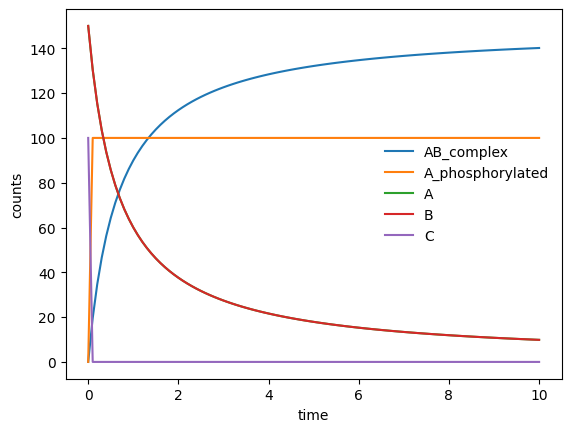

In [3]:
#| label: fig-ode
#| fig-cap: Plot of a simple A+B=C model, which showcases a single run of an ODE simulation.
# change file name here (if running your own code):
file_to_run = "./Dontcaredontwrite_bngl_example/ode_simple_dcdw.bngl"


# don't change anything after this

# this command runs the model in a temporary folder which is removed after execution is done
r = pybng.run(file_to_run, suppress=True)[0]

print(r.dtype.names) # this will print the names of the observables
# now we can loop over each observable name and plot them
for name in r.dtype.names:
    # we don't want to plot time
    if name != "time":
        # plot the observable values over time
        plt.plot(r['time'], r[name], label=name)
# label everything
plt.xlabel("time")
plt.ylabel("counts")
_ = plt.legend(frameon=False)

## Compartmental BionetGen

Compartmental BionNetGen is an extension of BNGL to enable explicit modelling of the compartmental organization of the cell and it’s effects on system dynamics @fig-bngl_comp. It introduces localization attributes for molecular species, as well as appropriate volumetric scaling of reaction rates. When modelling with BNG, a well-mixed environment is assumed and space has no effect on reactions. Importantly, cBNGL considers the division of the system into well mixed sub-volumes. Counterintuitively, a volume can be specified, which allows for further calculations of molecule concentrations, but it has no real effect on space since BNGL assumes the environment to be well-mixed @harris2009Compartmental. We use cBNGL for describing our multimeric models of CaMKII, so that we can model certain molecules interacting inside a cytoplasm and receptors to be modelled in a plasma membrane.

![(A) Illustration of a cell model with extracellular (EC), cytoplasmic (CP), nuclear (NU) and endosomal (EN) volumes and plasma (PM), endosomal (EM) and nuclear (NM) membrane surfaces. (B) Representation of the compartment topology by a directed graph. Volumes are represented by circles and membranes by arcs. A directed edge points from C1 to C2 if compartment C1 is immediately outside of compartment C2. (C) cBNGL specification of the topology shown in B, the number 3 stands for 3D volume and the number 2 stands for 2D encompassing membrane](background_figures/bngl_comp.PNG){#fig-bngl_comp}

## Network generation in BioNetGen
Every time a BNG model runs, a network of reactions can be created. This can be modified through the command “overwrite>1/0” (detailed specification can be found here @faeder2009Rulebased) , which allows you to choose whether you want to overwrite and create or not a new network each time you run the model. In network-based simulations, the full reaction network is enumerated. This is okay for smaller systems without a big number of reactions, but can become a liability when huge networks need to be computed every time the simulation is run, running into the combinatorial explosion problem. On the other hand, network-free simulations, such as the Network-Free Stochastic Simulator (NFsim) that BNG can use (@fig-bngl_architeq), only keeps track of the state of the system that actually exists, not every possible set of reactions (the reaction network). This makes simulating systems with a large reaction network and a high degree of combinatorial complexity not only possible, but also fast. Additionally,  BNG has  an  ”on-the-fly”  capability available for stochastic simulations,  which does not re-quire a pre-existing network and instead generates the full  network  using  the  model  rules  as  the  simulation takes place @faeder2009Rulebased.

![Software architecture of BioNetGen. The BioNetGen language (BNGL) file specifies a rule-based model that can be processed by the BioNetGen core version 2 (BNG2) in a variety of ways. BNG2 is the core component of this software as it is the network generation engine. It has a command-line interface,  and processes BNG input files to generate two kinds of outputs: a chemical reaction network derived by processing rules (.net) and/or the results of simulating a model exported to formats (SBML, MATLAB) that can be read by other programs. Simulation modules produce .cdat and .gdat files, which record the time courses of species concentrations and observables, respectively. The dashed arrow connecting the SSA module and BNG2 represents the on-the-fly network generation capability available for stochastic simulations.](background_figures/bngl_architeq.png){#fig-bngl_architeq}

## Why are we using Rule-Based Modelling to model CaMKII interactions?

So now that we have the background knowledge on how RBM works, let’s look into how and why I chose to model CaMKII interactions using this approach. Firstly, this way CaMKII can be modelled as a multi-subunit, multi-state complex, defined using BNGL syntax. This syntax allows for explicit representation of individual CaMKII hexamers with distinguishable subunits. 

Each subunit can independently undergo state changes: CaM binding, NMDAR binding, phosphorylation at Thr-286 and flicker between active and inactive state. Each subunit is bound to each other through their “left (l) and right (r) arms” bonds (Figure 14).

[INSERT FIGURE 14]

### CaMKII combinatorial explosion: how do we resolve this?

Even though RBM does help with combinatorial explosion in the ways explained above, CaMKII, even if modelled as a hexamer, can have a very high number of possible states per subunit. To quantify the combinatorial explosion, let’s consider each of the states in which each CaMKII subunit can be found (as per Figure 14). The activation flag can be in one of two states. The T286 phosphorylation site can also have two states. The CaM-binding flag can also be in two states, either be bound or unbound. Same goes for the NMDAR binding site which has two states. This means there is a total of 16 possible state combinations that a single subunit can exhibit.

[EMBED R CODE]

In [1]:
#import rpy2
#print(rpy2.__version__)
#import rpy2.robjects as robjects
#import rpy2.robjects.lib.ggplot2 as ggplot2
#%load_ext rpy2.ipython
#%R
#install.packages('plyr', repos = "http://cran.us.r-project.org")
#install.packages("numbers")
